# 3 - Regresión

**Sumario**

1. Introducción
2. Regresión lineal matemática
2. Funciones de pérdida
3. Regresión lineal simple con redes neuronales
4. Regresión no lineal múltiple con redes neuronales
5. Regularización

## 3.1 - Introducción

En tareas de regresión, nuestro objetivo es construir un modelo capaz de **predecir correctamente uno o varios valores numéricos continuos para cada uno de las instancias de entrada**. En este capítulo nos vamos a centrar en predecir un único valor numérico para cada una de las instancias. 

Por ejemplo, podemos querer predecir el precio de la vivienda en función de ciertos factores como el área de la casa, las habitaciones, el mobiliario, la cercanía a la carretera principal, etc.

<img src="images_3/vivienda.jpg" width="500" data-align="center">

Dependiendo del número de atributos que contemos para predecir, distinguimos dos tipos principales de regresión:
* **Regresión simple.** Contamos con un único atributo para predecir la variable objetivo.
* **Regresión múltiple.** Contamos con múltiples atributos para predecir la variable objetivo.

<table>
    <tr>
        <th>Regresión (lineal) simple</th>
        <th>regresión (lineal) múltiple</th>
    </tr>
    <tr>
        <td><img src="images_3/linear_regresion_simple.png" width="400" data-align="center"></td>
        <td><img src="images_3/linear_regresion_multiple.png" width="400" data-align="center"></td>
    </tr>
</table>

Dado un dataset con forma $(\mathbf{x}^{(i)}, y^{(i)})$, nuestro objetivo es aprender una función $f(\mathbf{x})$ con la que predecir $y$ dado $\mathbf{x}$, donde $y$ es un valor continuo. Dependiendo de la forma de $f(x)$, distinguimos dos tipos principales de regresión:
* **Regresión lineal.**
* **Regresión no lineal.**

<table>
    <tr>
        <th>Regresión lineal (simple)</th>
        <th>regresión no lineal (simple)</th>
    </tr>
    <tr>
        <td><img src="images_3/regresion_lineal.png" width="400" data-align="center"></td>
        <td><img src="images_3/regresion_no_lineal.png" width="800" data-align="center"></td>
    </tr>
</table>

En este caso, mostramos un ejemplo de regresión no lineal mediante el uso de un árbol de regresión. Otros métodos comunes de regresión no lineal incluyen: KNN y, por supuesto, **las redes neuronales**. Los métodos de regresión no lineal son **más flexibles**, pero por lo general son **menos interpretables**, ya que el modelo es considerablemente más complejo (e.g., las redes neuronales)

## 3.2 - Regresión lineal matemática

La regresión linal simple consiste en calcular un modelo de regresión que se corresponde con la ecuación de una recta:
    
$$
y = \beta_{0} + \beta_{1}x + \epsilon
$$

Donde $\beta_{0}$ se corresponde con la **ordenada de la recta**, $\beta_{1}$ con la **pendiente de la recta**, y $\epsilon$ con un **error aleatorio** o **residuo**. El proceso de estimación de los parámetros $\beta_{0}$ y $\beta_{1}$ (conocidos como los coeficientes de regresión) se suele realizar mediante el método de los mínimos cuadrados, cuya fórmula es la siguiente:

$$
\begin{align*}
\hat{\beta}_{1} &= \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}} = \frac{S_{y}}{S_{x}}R\\
\hat{\beta}_{0} &= \bar{y} - \beta_{1}x
\end{align*}
$$

Donde $S_{x}$ y $S_{y}$ son las desviaciones típicas de cada variable y $R$ es el coeficiente de correlación. Por su parte, $\beta_{0}$ se corresponde con el valor esperado de $y$ cuando $x=0$. La siguiente figura muestra la recta resultante de aplicar el método de minimoso cuadrados:

<img src="images_3/minimos_cuadrados.png" width="400" data-align="center">

### 3.2.1 - Condiciones para aplicar exitosamente la regresión lineal

A la hora de construir un modelo basado en una regresión lineal, deben cumplirse una serie de criteriors para poder calcular los parámetros de la recta:
    
* **Linealidad.** La relación entre la variable predictora y la variable a predecir debe ser lineal.
* **Distribución normal de los residuos.** Los residuos han de distribuirse de forma normal, con una media igual a 0. Esto se puede comprobar mediante un histograma o un test de hipótesis de normalidad. **Los valores extremos suelen ser una causa frecuente por la que se infringe la condición de normalidad**.
* **Varianza de residuos constante (homocedasticidad).** varianza de los residuos ha de ser prácticamente constante a lo largo del eje $x$.

Para comprobar si se cumplen estas condiciones, es necesario calcular los residuos y, a continuación validar el modelo.

### 3.2.1 Implementación de una regresión lineal simple con Tensorflow

#### Carga de datos


En primer lugar tenemos que cargar los datos y generar los splits de entrenamiento, validación y test. Utilizaremos el [Ames Housing dataset de Kaggle](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset) para ello. 

----

**Nota:** Por simplicidad, he descargado los datos de antemano y los he colocado en la carpeta "data" del directorio actual.

-----

<details>
    <summary><b>Explicación de las variables</b> (Hacer click)</summary>
  
* Feature variables:
    * **MSSubClass** : The building class
    * **MSZoning** : The general zoning classification
    * **LotFrontage** : Linear feet of street connected to property
    * **LotArea** : Lot size in square feet
    * **Street** : Type of road access
    * **Alley** : Type of alley access
    * **LotShape** : General shape of property
    * **LandContour** : Flatness of the property
    * **Utilities** : Type of utilities available
    * **LotConfig** : Lot configuration
    * **LandSlope** : Slope of property
    * **Neighborhood** : Physical locations within Ames city limits
    * **Condition1** : Proximity to main road or railroad
    * **Condition2** : Proximity to main road or railroad (if a second is present)
    * **BldgType** : Type of dwelling
    * **HouseStyle** : Style of dwelling
    * **OverallQual** : Overall material and finish quality
    * **OverallCond** : Overall condition rating
    * **YearBuilt** : Original construction date
    * **YearRemodAdd** : Remodel date
    * **RoofStyle** : Type of roof
    * **RoofMatl** : Roof material
    * **Exterior1st** : Exterior covering on house
    * **Exterior2nd** : Exterior covering on house (if more than one material)
    * **MasVnrType** : Masonry veneer type
    * **MasVnrArea** : Masonry veneer area in square feet
    * **ExterQual** : Exterior material quality
    * **ExterCond** : Present condition of the material on the exterior
    * **Foundation** : Type of foundation
    * **BsmtQual** : Height of the basement
    * **BsmtCond** : General condition of the basement
    * **BsmtExposure** : Walkout or garden level basement walls
    * **BsmtFinType1** : Quality of basement finished area
    * **BsmtFinSF1** : Type 1 finished square feet
    * **BsmtFinType2** : Quality of second finished area (if present)
    * **BsmtFinSF2** : Type 2 finished square feet
    * **BsmtUnfSF** : Unfinished square feet of basement area
    * **TotalBsmtSF** : Total square feet of basement area
    * **Heating** : Type of heating
    * **HeatingQC** : Heating quality and condition
    * **CentralAir** : Central air conditioning
    * **Electrical** : Electrical system
    * **1stFlrSF** : First Floor square feet
    * **2ndFlrSF** : Second floor square feet
    * **LowQualFinSF** : Low quality finished square feet (all floors)
    * **GrLivArea** : Above grade (ground) living area square feet
    * **BsmtFullBath** : Basement full bathrooms
    * **BsmtHalfBath** : Basement half bathrooms
    * **FullBath** : Full bathrooms above grade
    * **HalfBath** : Half baths above grade
    * **Bedroom** : Number of bedrooms above basement level
    * **Kitchen** : Number of kitchens
    * **KitchenQual** : Kitchen quality
    * **TotRmsAbvGrd** : Total rooms above grade (does not include bathrooms)
    * **Functional** : Home functionality rating
    * **Fireplaces** : Number of fireplaces
    * **FireplaceQu** : Fireplace quality
    * **GarageType** : Garage location
    * **GarageYrBlt** : Year garage was built
    * **GarageFinish** : Interior finish of the garage
    * **GarageCars** : Size of garage in car capacity
    * **GarageArea** : Size of garage in square feet
    * **GarageQual** : Garage quality
    * **GarageCond** : Garage condition
    * **PavedDrive** : Paved driveway
    * **WoodDeckSF** : Wood deck area in square feet
    * **OpenPorchSF** : Open porch area in square feet
    * **EnclosedPorch** : Enclosed porch area in square feet
    * **3SsnPorch** : Three season porch area in square feet
    * **ScreenPorch** : Screen porch area in square feet
    * **PoolArea** : Pool area in square feet
    * **PoolQC** : Pool quality
    * **Fence** : Fence quality
    * **MiscFeature** : Miscellaneous feature not covered in other categories
    * **MiscVal** : Value of miscellaneous feature in \$
    * **MoSold** : Month Sold
    * **YrSold** : Year Sold
    * **SaleType** : Type of sale
    * **SaleCondition** : Condition of sale


* Predictive variable:
    * **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
</details>

<br>

Para este ejemplo, vamos a utilizar como variable predictora el número de habitaciones en la casa (excluyendo las del sótano) `TotRms AbvGrd` y como variable a predecir el precio de la vivienda `SalePrice`.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("./data/AmesHousing.csv")

# Seleccionamos la columna que nos interesa como predictora y le aplicamos normalización estándar
data_x = data["TotRms AbvGrd"] / data["TotRms AbvGrd"].max()

# Seleccionamos la variabla predecir y le aplicamos normalización estándar
data_y = data["SalePrice"] / data["SalePrice"].max()

x_train, x_test, y_train, y_test = train_test_split(
    data_x,
    data_y,
    test_size=0.10,
    random_state=0
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.10,
    random_state=0
)

print(f"Training instances: {x_train.shape[0]}")
print(f"Validation instances: {x_val.shape[0]}")
print(f"Test instances: {x_test.shape[0]}")

Training instances: 2373
Validation instances: 264
Test instances: 293


#### Entrenamiento

Para el entrenamiento, vamos a definir el modelo a mano y utilizar el método del descenso por gradiente para su optimización. 

<img src="images_3/linear_Regression_gradient_descent.gif" width="400" data-align="center">

Con este propósito en mente, vamos a utilizar la API de diferenciación automatica de Tensorflow `tf.GradientTape`. [Para más información acerca de ella, recomiendo echar un ojo a la documentación original, especialmente su tutorial](https://www.tensorflow.org/api_docs/python/tf/GradientTape).

In [2]:
import tensorflow as tf

b0 = tf.Variable(0., dtype=tf.float32)
b1 = tf.Variable(0., dtype=tf.float32)

# Si disminuimos el lr, el modelo aprenderá mas lento pero será "más preciso" en su optimización. 
# En tal caso deberiamos aumentar el numero de epochs
lr = 0.1 
num_epochs = 10

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        with tf.GradientTape() as t:
            y_pred = b1 * x_train + b0
            current_loss = tf.reduce_mean(tf.square(y_pred - y_train))
        
        lr_b1, lr_b0 = tape.gradient(current_loss, [b1, b0])
        b1.assign_sub(lr * lr_b1)
        b0.assign_sub(lr * lr_b0)
        
        y_val_pred = b1 * x_val + b0
        val_loss = tf.reduce_mean(tf.square(y_val_pred - y_val))
        
        tf.print(f"Epoch: {epoch+1}")
        tf.print(f"Loss: {current_loss} - val_loss {val_loss}")

Epoch: 1
Loss: 0.06843797862529755 - val_loss 0.0429266095161438
Epoch: 2
Loss: 0.04415927454829216 - val_loss 0.02915279194712639
Epoch: 3
Loss: 0.03002299927175045 - val_loss 0.021184256300330162
Epoch: 4
Loss: 0.021791117265820503 - val_loss 0.01658261939883232
Epoch: 5
Loss: 0.01699644699692726 - val_loss 0.01393139734864235
Epoch: 6
Loss: 0.014202751219272614 - val_loss 0.01240827701985836
Epoch: 7
Loss: 0.012573916465044022 - val_loss 0.011536307632923126
Epoch: 8
Loss: 0.01162321213632822 - val_loss 0.011039153672754765
Epoch: 9
Loss: 0.011067281477153301 - val_loss 0.010756966657936573
Epoch: 10
Loss: 0.010741183534264565 - val_loss 0.010597459971904755


#### Visualización

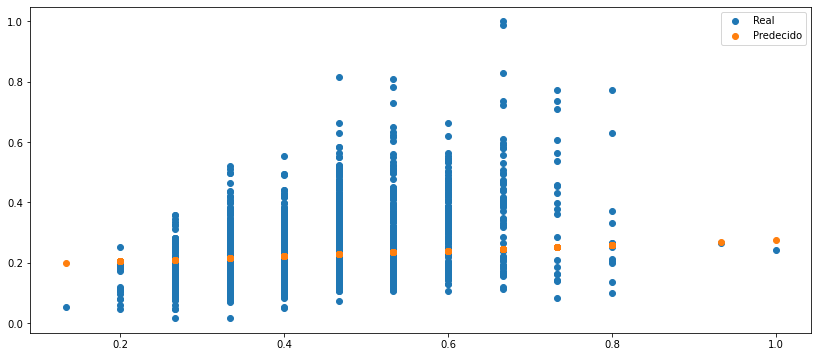

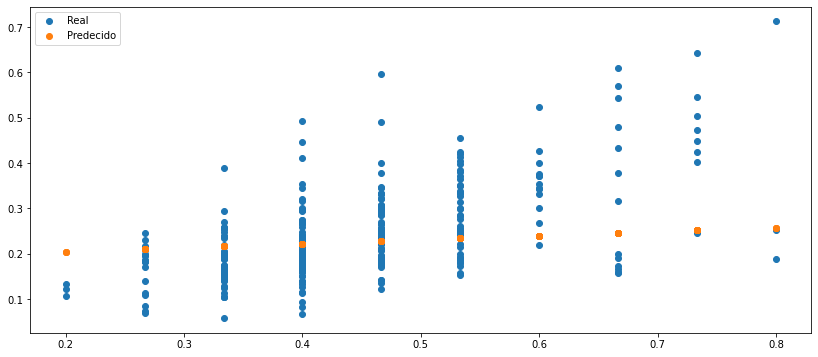

In [3]:
import matplotlib.pyplot as plt

def model(b0, b1, x_train):
    return b1 * x_train + b0

def print_regression_line(b0, b1, X_print, X, Y):
    plt.rcParams["figure.figsize"] = (14,6)
    plt.rcParams["lines.linewidth"] = 3
    plt.rcParams["axes.labelsize"] = 20
    plt.scatter(X_print, Y, label="Real")
    plt.scatter(X_print, model(b0, b1, X), label="Predecido")
    plt.legend(["Real", "Predecido"])
    plt.show()

print_regression_line(b0, b1, x_train, x_train, y_train)
print_regression_line(b0, b1, x_test, x_test, y_test)

## 3.3 - Funciones de pérdida (*loss*)

En el tema anterior, hemos descrito las diferentes funciones de pérdida que se aplica cuando construimos redes neuronales para clasificación. Sin embargo, estas funciones no pueden aplicarse a modelos de regresión dada la naturaleza de su salida, ya que el resultado de este tipo de modelos **es un valor numérico de tipo decimal y no un conjunto de clases y/o etiquetas**.

### 3.3.1 - Error cuadrático medio (MSE)

El error cuadrático medio (**Mean Square Error**, MSE por sus siglas en inglés) es, probablemente, **la métrica más sencilla y la más utilizada** para evaluar la pérdida de un modelo de regresión. Se calcula mediante la siguiente formula:

$$
MSE(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}
$$

Donde $n$ es el número de instancias de entrenamiento que se utilizará para calcular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}_{i}$ el valor de salida predecido. Esta métrica nos devuelve siempre valores positivos, de forma que **cuanto más se aproximen a cero mejor será el modelo que hemos construido**. 

Uno de sus grandes problemas es que **aumenta muy rápido con valores extremos** debido al cuadrado de la diferencia de los valores. Esto nos puede causar un problema si no hemos normalizado la variable objetivo y esta trabaja con valores muy grandes/muy pequeños. Por otro lado, es positivo que eleve al cuadrado la diferencia ya que **penaliza fuertemente los valores atípicos**.

Otro problema del MSE es su interpretabilidad, ya que nos está indicando la diferencia cuadrática promedio. **Seria interesante que el error trabajase en la misma "escala" que las predicciones, no en su versión cuadrática**.

### 3.3.2 - Raíz cuadrada del error cuadrático medio (RMSE)

Para solventar las limitaciones del MSE, podemos aplicar la raiz cuadrada al resultado. Con ello, tendriamos el **Root Mean Square Error** (RMSE). Esta función se calcula por tanto mediante la siguiente fórmula:

$$
RMSE(\mathbf{y}, \mathbf{\hat{y}}) = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}} = \sqrt{MSE(y, \hat{y})}
$$

Donde $n$ es el número de instancias de entrenamiento que se utilizará para calcular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}_{i}$ el valor de salida predecido. Esta métrica nos devuelve siempre valores positivos, de forma que **cuanto más se aproximen a cero mejor será el modelo que hemos construido**. 

### 3.3.3 - Error absoluto medio (MAE)

El error absoluto medio (**Mean Absolute Error**, MAE por sus siglas en inglés) es una función que permite evaluar un modelo calculando **el error promedio de las diferencias aboslutas** entre las predicciones y los valores reales. Se calcula mediante la siguiente fórmula:

$$
MAE(\mathbf{y}, \mathbf{\hat{y}}) = \frac{\sum_{i=1}^{n}|y_{i} - \hat{y}_{i}|}{n}
$$

Donde $n$ es el número de instancias de entrenamiento que se utilizará para clacular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}_{i}$ el valor de salida predecido. Se trata de una función que devuelve siempre valores positivos.

Similar a RMSE, trabaja en la misma escala que las predicciones. Sin embargo, **a diferencia de MSE/RMSE no penaliza tanto los valores atípicos ya que no eleva al cuadrado la diferencia**.

Este tipo de función de pérdida se suele utilizar en elos procesos de análisis de series temporales.

### 3.3.4 - Coeficiente de determinación

El coeficiente de determinación o $R^{2}$ se calcula a partir del MSE pero cuenta con la enorme ventaja de estar libre de escala. Por tanto, no importa si los valores de salida son muy grandes o muy pequeños, el $R^{2}$ siempre se situará en $[-\infty, 1]$. Se calcula de la siguiente forma:

$$
R^{2}(\mathbf{y}, \mathbf{\hat{y}}) = \frac{MSE(y, \hat{y})}{MSE_{\text{baseline}}(y, \hat{y})}
$$

Donde $MSE_{\text{baseline}}$ se calcula por medio de la siguiente fórmula:

$$
MSE(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \bar{y}_{i})^{2}
$$

Donde  $n$ es el número de instancias de entrenamiento que se utilizará para calcular el valor de pérdida, $y_{i}$ el valor de salida esperado e $\hat{y}$ la **media aritmética** de los valores de $\mathbf{y}$. El valor generado por $MSE_{\text{baseline}}$ **se corresponde con el modelo más simple posible para predecir los valores de** $\mathbf{y}$.

## 3.4 - Regresión lineal simple con redes neuronales

Como ya hemos comentado anteriormente, la regresión lineal simple es el modelo de regresión más sencillo y considera dos variables numéricas: (1) una variable independiente, normalmente identificada como $x$, y (2) una variable dependiente, normalmente identificada como $y$. El objetivo es identificar los coeficientes de la recta de regresión que mejor aproxime los valores de $y$.

En este caso vamos a ver como podemos utilizar una red neuronal para construir un modelo de regresión lineal. Para ello utilizaremos **una única capa oculta con un número de neuronas igual al número de variables de entrada**. Dado que este caso se centra en regresión simple, contaremos con una única neurona.

### 3.4.1 - Preparación de datos

Con respecto a los datos de entrenamiento, vamos a utilizar el [Ames Housing dataset de Kaggle](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset).

En este caso, vamos a utilizar el mismo split que en la sección 3.2.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("./data/AmesHousing.csv")

# Seleccionamos la columna que nos interesa como predictora y le aplicamos normalización estándar
data_x = data["TotRms AbvGrd"] / data["TotRms AbvGrd"].max()

# Seleccionamos la variabla predecir y le aplicamos normalización estándar
data_y = data["SalePrice"] / data["SalePrice"].max()

x_train, x_test, y_train, y_test = train_test_split(
    data_x,
    data_y,
    test_size=0.10,
    random_state=0
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.10,
    random_state=0
)

print(f"Training instances: {x_train.shape[0]}")
print(f"Validation instances: {x_val.shape[0]}")
print(f"Test instances: {x_test.shape[0]}")

Training instances: 2373
Validation instances: 264
Test instances: 293


### 3.4.2 - Construcción de la red

Una vez preparados nuestros datos, ya podemos construir nuestra red neuronal. Para ello, vamos a crear una red formada por una única capa mediante Keras:
* Una capa densa de una neurona con una función de activación de tipo lineal.

----

**Nota:** Si nos fijamos, **en este caso estamos hemos combinado la capa de entrada con la primera capa densa**. Esto es un pequeño "truco" que podemos utilizar cuando el número de neuronas de la primera capa densa coincide con el número de neuronas de entrada.

----

In [5]:
import tensorflow as tf
from tensorflow import keras

# Creación de las capas que forman la estructura de la red
layers = [keras.layers.Dense(1,
                             input_shape=(1,),
                             activation=tf.keras.activations.linear)
         ]

# Compilación de la red neuronal
model_linear_simple = keras.Sequential(layers, name="linear_regression_simple_model")
          
# Configuración del algoritmo de optimización y función de loss
model_linear_simple.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="mse",
    metrics=[keras.metrics.RootMeanSquaredError(), "mse", "mae"]
)

model_linear_simple.summary()

Model: "linear_regression_simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Como podemos ver el modelo solo cuenta con dos parámetros que equivalen a $\beta_{0}$ (bias) y $\beta_{1}$ (el paramétro propio de la neurona).

### 3.4.3 - Entrenamiento

Una vez compilada nuestra red, podemos iniciar el proceso de entrenamiento mediante la función `fit()`. En este caso hemos seleccionado las siguientes opciones:
* Número de epochs: 25
* Tamaño del batch de entrenamiento: 250 instancias

En este caso no seleccionamos un porcentaje del conjunto de entrenamiento como validación ya que vamos a utilizar el anteriormente definido (simplemente para demostrar como se hace).

In [6]:
import datetime
from time import time
from keras.callbacks import TensorBoard

# Definición de los callback de TF Board
tensorboard_callback = TensorBoard(log_dir="logs_linear_regression_simple")

# Ejecución del proceso de aprendizaje
model_linear_simple.fit(
    x_train,
    y_train,
    epochs=25, # Numero de iteraciones
    batch_size=250, # Tamaño de los batches
    validation_data=(x_val, y_val),  # conjunto de validación
    callbacks=[tensorboard_callback]
)

Epoch 1/25
10/10 [==============================] - 1s 49ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200 - mse: 0.0144 - mae: 0.0857 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1109 - val_mse: 0.0123 - val_mae: 0.0776
Epoch 2/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - mse: 0.0122 - mae: 0.0761 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1036 - val_mse: 0.0107 - val_mae: 0.0705
Epoch 3/25
10/10 [==============================] - 0s 13ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - mse: 0.0109 - mae: 0.0703 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988 - val_mse: 0.0098 - val_mae: 0.0666
Epoch 4/25
10/10 [==============================] - 0s 10ms/step - loss: 0.0101 - root_mean_squared_error: 0.1004 - mse: 0.0101 - mae: 0.0671 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958 - val_mse: 0.0092 - val_mae: 0.0649
Epoch 5/25
10/10 [==============================] - 0s 10ms/

### 3.4.4 - Visualización

75/75 [==============================] - 0s 999us/step


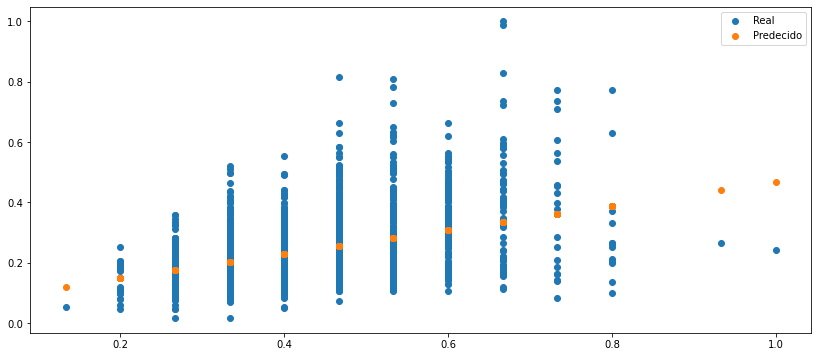

10/10 [==============================] - 0s 1ms/step


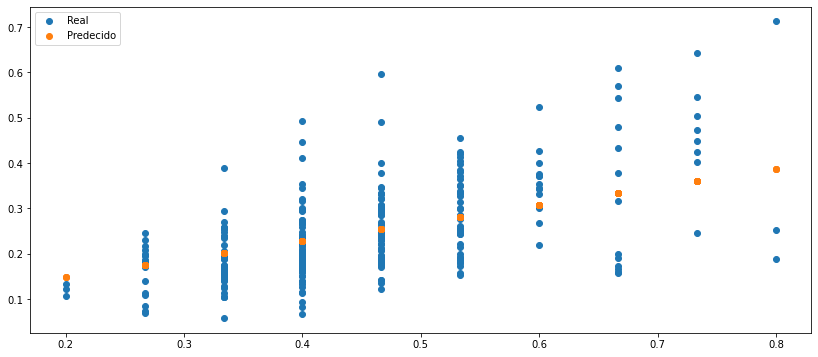

In [7]:
import matplotlib.pyplot as plt

def print_neural_regression_line(model, X_print, X, Y):
    plt.rcParams["figure.figsize"] = (14, 6)
    plt.rcParams["lines.linewidth"] = 3
    plt.rcParams["axes.labelsize"] = 20
    plt.scatter(X_print, Y, label="Real")
    plt.scatter(X_print, model.predict(X).flatten(), label="Predecido")
    plt.legend(["Real", "Predecido"])
    plt.show()
    
print_neural_regression_line(model_linear_simple, x_train, x_train, y_train)
print_neural_regression_line(model_linear_simple, x_test, x_test, y_test)

Como podemos observar, el ajuste del modelo no es muy bueno porque **no cuenta con la flexibilidad suficiente para explicar de manera correcta la variable independiente**. 

Por otro lado, si nos fijamos el resultado es el mismo que en la sección 3.2, ya que **en ambos casos estamos trabajando con un modelo de regresión lineal simple**.

## 3.5 - Regresión no lineal múltiple con redes neuronales

En el apartado anterior hemos constatado las limitaciones de la regresión lineal simple:
* **Un modelo lineal no tiene flexibilidad suficiente** para representar adecuadamente el comportamiento de variables dependientes "complejas".
* Utilizar **una única variable independiente es en la mayoría de los casos insuficiente**.

En este sentido, construiremos un modelo de regresión con múltiples variables independientes y cuya función no sea lineal. Para ello, utilizaremos una red neuronal con **múltiples capas ocultas cuyas funciones de activación sean no lineales** (ReLU, sigmoidea, tangente hiperbólica, etc.).

### 3.5.1 - Preparación de datos

Vamos a utilizar el [Ames Housing dataset de Kaggle](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset). Sin embargo, en este caso vamos seleccionar un conjunto de variables independientes para el proceso de entrenamiento. Para este ejemplo, hemos seleccionado los siguientes 13 atributos:

* **TotRms AbvGrd** : Total rooms above grade (does not include bathrooms)
* **Mo Sold** : Month Sold
* **Yr Sold** : Year Sold
* **Overall Qual** : Overall material and finish quality
* **Overall Cond** : Overall condition rating
* **Year Built** : Original construction date
* **Year Remod/Add** : Remodel date
* **1st Flr SF** : First Floor square feet
* **2nd Flr SF** : Second floor square feet
* **Full Bath** : Full bathrooms above grade
* **Half Bath** : Half baths above grade
* **Bedroom AbvGr** : Number of bedrooms above basement level
* **Kitchen AbvGr** : Number of kitchens

Como variable objetivo (i.e., dependiente), hemos seleccionado el precio de venta de la vivienda (**SalePrice**), cuyo rango de valores se sitúa entre 34900 y 755000

In [8]:
import pandas as pd

full_data = pd.read_csv("./data/AmesHousing.csv")

attributes = [
    "TotRms AbvGrd",
    "Mo Sold",
    "Yr Sold",
    "Overall Qual",
    "Overall Cond",
    "Year Built",
    "Year Remod/Add",
    "1st Flr SF",
    "2nd Flr SF",
    "Full Bath",
    "Half Bath",
    "Bedroom AbvGr",
    "Kitchen AbvGr"
]

data_y = full_data["SalePrice"]
data_x = full_data[attributes]
data_x
#data_y

,TotRms AbvGrd,Mo Sold,Yr Sold,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr
0,7,5,2010,6,5,1960,1960,1656,0,1,0,3,1
1,5,6,2010,5,6,1961,1961,896,0,1,0,2,1
2,6,6,2010,6,6,1958,1958,1329,0,1,1,3,1
3,8,4,2010,7,5,1968,1968,2110,0,2,1,3,1
4,6,3,2010,5,5,1997,1998,928,701,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,3,2006,6,6,1984,1984,1003,0,1,0,3,1
2926,5,6,2006,5,5,1983,1983,902,0,1,0,2,1
2927,6,7,2006,5,5,1992,1992,970,0,1,0,3,1
2928,6,4,2006,5,5,1974,1975,1389,0,1,0,2,1


----

**Nota:** En este caso hemos seleccionado directamente los 13 atributos porque nuestro objetivo es explicar la regresión múltiple con redes neuronales. Sin embargo, en un caso real es muy importante analizar cada uno de estos atributos, así como el modo en que se relacionan entre sí. Por tanto, **se recomienda examinar la correlación existente entre los atributos** y el formato en el que se encuentran representados con el objetivo de **seleccionar aquellos que nos ofrezcan un mejor resultado** y determinar el tipo de transformaciones que debemos realizar sobre ellos.

----

Una vez cargados los datos vamos a **normalizar los valores de la variables independientes** con el objetivo de que estos se encuentren definidos en un rango comprendido entre 0 y 1, de manera que los valores de todas las variables estén representados de manera similar.

Después, **transformar las instancias a formato de tensores**.

Finalmente, vamos a dividir los datos en los **conjuntos de entrenamiento, test y validación**. En este caso, vamos a seguir el mismo acercamiento que las secciones 3.2 y 3.3, diviendo manualmente los datos en vez de utilizar el método `fit()` de Keras para generar el conjunto de validación.

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Aplicación de un proceso de normalización para que los valores se representen entre 0 y 1
min_max_scaler = preprocessing.MinMaxScaler()

data_x = pd.DataFrame(
    data=min_max_scaler.fit_transform(data_x),
    columns=data_x.columns
)

data_y = data_y / data_y.max()

# Generación de los conjuntos de entrenamiento, test y validación
x_train, x_test, y_train, y_test = train_test_split(
    data_x,
    data_y,
    test_size=0.10,
    random_state=0
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train,
    y_train,
    test_size=0.10,
    random_state=0
)

# Transformación del conjunto de entrenamiento en tensores
X_train = tf.convert_to_tensor(x_train, np.float32)
y_train = tf.convert_to_tensor(y_train)

# Transformación del conjunto de test en tensores
X_test = tf.convert_to_tensor(x_test, np.float32)
y_test = tf.convert_to_tensor(y_test)

# Transformación del conjunto de validación en tensores
X_val = tf.convert_to_tensor(x_val, np.float32)
y_val = tf.convert_to_tensor(y_val)

### 3.5.2 - Construcción de la red

Una vez preparados nuestros datos, podremos construir nuestra red de neuronas. En este caso vamos a considerar una red formada por cuatro capas (donde la primera capa combina la entrada con la primera capa densa):

* Una capa densa con 13 neuronas (número de atributos de entrada) y una función de activación ReLU.
* Una capa densa con 39 neuronas y una función de activación ReLU.
* Una capa densa con 13 neuronas y una función de activación ReLU.
* Una capa de salida con 1 neurona y una función de activación lineal.

Para la última capa, hemos decidido utilizar una función de activación lineal. En este problema en particular, como **el precio de una vivienda no puede ser negativo**, podriamos haber utilizado en su lugar una función de activación final (i.e.,"output") ReLU en su lugar (podemos hacer la prueba y comparar resultado).

<details>
    <summary><b>Recordatorio funciones de activación</b></summary>
<table>
    <tr>
        <th>Función lineal</th>
        <th>Función ReLU</th>
    </tr>
    <tr>
        <td><img src="images_1/funcion_lineal.png" width="500" data-align="center"></td>
        <td><img src="images_1/funcion_relu.png" width="500" data-align="center"></td>
    </tr>
</table>
</details>

<br>

Además, para cada una de las capas, vamos a realizar una inicialización mediante el **método He**, el cual utiliza una distribución normal con media $0$, así como una desviación estándar calculada de la siguiente manera:
    $$
    \sigma = \sqrt{\frac{1}{n_{c-1}}}
    $$
En Tensorflow, se define mediante la función `variance_scaling_initializer`.

In [10]:
import tensorflow as tf
from tensorflow import keras

# Creación de las capas que forman la estructura de la red
layers = [
    keras.layers.Dense(
        units=13,
        input_shape=(13,),
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.relu
    ),
    keras.layers.Dense(
        units=39,
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.relu
    ),
    keras.layers.Dense(
        units=13,
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.relu
    ),
    keras.layers.Dense(
        units=1,
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.linear
    )
]

# Compilación de la red neuronal
model_nonlinear_multiple = keras.Sequential(layers, name="non_linear_regression_multiple_model")

# Configuración del algoritmo de optmización y funcion de loss
model_nonlinear_multiple.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="mse",
    metrics=[keras.metrics.RootMeanSquaredError(), "mse", "mae"]
)

model_nonlinear_multiple.summary()

Model: "non_linear_regression_multiple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 39)                546       
                                                                 
 dense_3 (Dense)             (None, 13)                520       
                                                                 
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
_________________________________________________________________


Con respecto a los parámetros observamos lo siguiente:
* La capa densa `dense_3` está formada por 13 neuronas, cada una de ellas con 13 parámetros de entrada y un parámetro de *bias*, haciendo un total de **182** (13 * 13 + 13).
* La capa densa `dense_4` está formada por 39 neuronas, cada una de ellas con 13 parámetros de entrada y un parámetro de *bias*, haciendo un total de **546** (39 * 13 + 39).
* La capa densa `dense_5` está formada por 13 neuronas, cada una de ellas con 13 parámetros de entrada y un parámetro de *bias*, haciendo un total de **520** (39 * 13 + 13).
* La capa densa `dense_6` está formada por 1 neuronas, cada una de ellas con 13 parámetros de entrada y un parámetro de *bias*, haciendo un total de **14** (13 * 1 + 1).

### 3.5.3 - Entrenamiento

Una vez compilada nuestra red de neuronas, podemos iniciar el proceso de entrenamiento mediante la función `fit()`. En este caso, hemos seleccionado las siguientes opciones:

* Número de epochs: 100
* Tamaño del batch de entrenamiento: 250 instancias

Al igual que en el ejemplo de regresión lineal anterior, no seleccionamos un porcentaje del conjunto de entrenamiento como validación sino que vamos a utilizar el conjunto de validación que hemos definido manualmnente.

In [11]:
import datetime
from time import time
from keras.callbacks import TensorBoard

# Definición de los callback de TF Board
tensorboard_callback = TensorBoard(log_dir="logs_nonlinear_regression_multiple")

# Ejecución del proceso de aprendizaje
model_nonlinear_multiple.fit(
    X_train,
    y_train,
    epochs=50, # Numero de iteraciones
    batch_size=250, # Tamaño de los batches
    validation_data=(X_val, y_val),  # conjunto de validación
    callbacks=[tensorboard_callback]
)

Epoch 1/50
10/10 [==============================] - 1s 39ms/step - loss: 0.1138 - root_mean_squared_error: 0.3373 - mse: 0.1138 - mae: 0.2727 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1545 - val_mse: 0.0239 - val_mae: 0.1147
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0213 - root_mean_squared_error: 0.1461 - mse: 0.0213 - mae: 0.1075 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1411 - val_mse: 0.0199 - val_mae: 0.1030
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0193 - root_mean_squared_error: 0.1390 - mse: 0.0193 - mae: 0.1020 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1377 - val_mse: 0.0190 - val_mae: 0.1001
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - mse: 0.0184 - mae: 0.0993 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1347 - val_mse: 0.0182 - val_mae: 0.0980
Epoch 5/50
10/10 [==============================] - 0s 9ms/ste

### 3.5.4 - Visualización

75/75 [==============================] - 0s 1ms/step


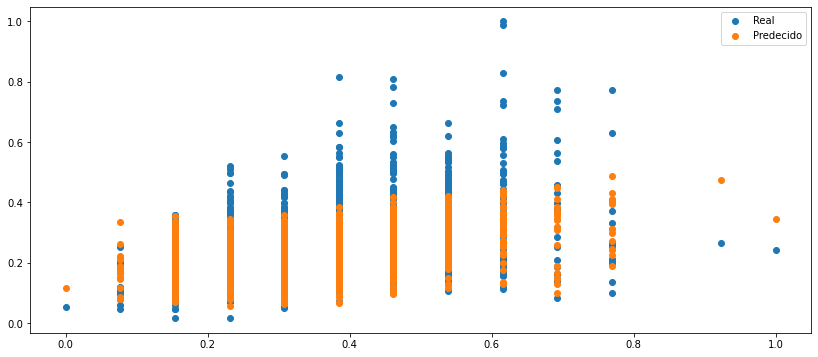

10/10 [==============================] - 0s 1ms/step


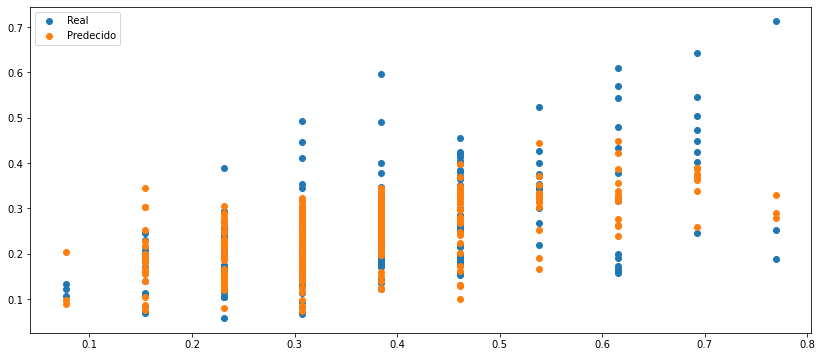

In [12]:
import matplotlib.pyplot as plt

def print_neural_regression_line(model, X_print, X, Y):
    plt.rcParams["figure.figsize"] = (14, 6)
    plt.rcParams["lines.linewidth"] = 3
    plt.rcParams["axes.labelsize"] = 20
    plt.scatter(X_print, Y, label="Real")
    plt.scatter(X_print, model.predict(X).flatten(), label="Predecido")
    plt.legend(["Real", "Predecido"])
    plt.show()
    
print_neural_regression_line(model_nonlinear_multiple, x_train["TotRms AbvGrd"], X_train, y_train)
print_neural_regression_line(model_nonlinear_multiple, x_test["TotRms AbvGrd"], X_test, y_test)

En este caso, podemos observar que el modelo generado mediante una regresión múltiple es mucho mejor que el modelo lineal simple que habiamos definido anteriormente. Ésta evolución se observa tanto en los datos de entrenamiento como en los datos test.

Importante señalar, que si bien es mejor, tiene aun rango de mejora. Quizás con más atributos, más capas y un mayor número de instancias podriamos obtener mejores resultados.

## 3.6 - Regularización

La regularización es una técnica destinada a reducir la complejidad de los modelos de aprendizaje automático, de manera que estos sean capaces de generalizar mejor sobre datos nuevos que no se encuentren en los datos de entrenamiento.

La regularización tiene como objetivo evitar o reducir el sobreajuste (i.e., overfitting). El sobreajuste se puede observar cuando el valor de pérdida en los datos de entrenamiento sigue decreciendo mientras que en los datos de validación comienza a crecer.

<img src="images_3/overfitting.png" width="500" data-align="center">

Para tratar de evitar esta situación, se modifica la función de pérdida incluyendo **un nuevo elemento a minimizar durante el entrenamiento: la complejidad del modelo**. De este modo, además de minimizar el error, intentamos minimizar la complejidad del modelo con el objetivo de construir modelos mas sencillos que tengan poco error o pérdida.

Por ejemplo, si estuvieramos si estuvieramos utilizando como función de pérdida el error cuadrático medio (MSE) y quisieramos algún tipo de regularización, deberiamos añadir un nuevo término que penalice la complejidad del modelo de la siguiente manera:

$$
\text{Loss}(\mathbf{y}, \hat{\mathbf{y}}) = MSE(\mathbf{y}, \hat{\mathbf{y}}) + \delta * C
$$

Donde $C$ es la medida de la complejidad del modelo y $\delta$ es un hiperparámetro que nos indica el nivel de importancia que le otorgamos al proceso de regularización (con el objetivo de **balancear el rendimiento del modelo y su complejidad**). 

Las tres técnicas más comunes de regularización son:
1. **Regularización L1**
2. **Regularización L2**
3. **Regularización *Elastic Net***

----

**Nota:** Si bien estamos explicando regularización poniendo como ejemplo una función de perdida apropiada para tareas de regresión, **podemos aplicar regularización a otros tipos de funciones de pérdida, como aquellas de tareas de clasificación.**

----

### 3.6.1 - Regularización L1

La regularización L1 o regularización *Lasso* **mide la complejidad como la media del valor absoluto de los parámetros del modelo** de la siguiente manera:

$$
C=\frac{1}{m} \sum_{j=1}^{m}|w_{j}|
$$

Donde $m$ representa el número de parámetros del modelo. En el caso de que quisiéramos aplicar este tipo de regularización sobre el error cuadrático medio, deberíamos recurrir a la siguiente fórmula:

$$
\begin{align*}
\text{Loss}(\mathbf{y}, \hat{\mathbf{y}}) &= MSE(\mathbf{y}, \hat{\mathbf{y}}) + \delta * C \\
&= \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} + \delta * \frac{1}{m} \sum_{j=1}^{m}|w_{j}|
\end{align*}
$$

Donde $\delta$ es un hiperparámetro que nos indica el nivel de importancia que le otorgamos al proceso de regularización. 

Este tipo de regularización nos permite simplificar el modelo en situaciones donde sospechamos que **algunos de los atributos de entrada son irrelevantes**, es decir, no ejercen ninguna influencia sobre la salida (e.g., son ruido).

Desde un punto de vista matemático, este tipo de regularización **fuerza a que algunos de los parámetros de la red (i.e., pesos) adopten valores muy cercanos a $0$**, de forma que la influencia de la neurona a la que multiplican no tenga influencia desde el punto de vista del resultado.

Se aplica a los pesos de las conexiones a traves de la propiedad `kernel_regularizer`, mediante el método `keras.regularizers.l1`.

In [13]:
import tensorflow as tf
from tensorflow import keras

# Creación de las capas que forman la estructura de la red
layers = [
    keras.layers.Dense(
        units=8,
        input_shape=(8,),
        activation=tf.keras.activations.relu,
        kernel_initializer="he_uniform",
        kernel_regularizer=keras.regularizers.l1(l=0.1) # 'l' representa el valor de importancia de la regularización
    ),
    keras.layers.Dense(
        units=4,
        activation=tf.keras.activations.relu,
        kernel_initializer="he_uniform",
        kernel_regularizer=keras.regularizers.l1(l=0.1) # 'l' representa el valor de importancia de la regularización
    ),
    keras.layers.Dense(
        units=1,
        activation=tf.keras.activations.sigmoid
    ),
]

# Compilación del modelo
model = keras.models.Sequential(layers, name="L1_regularization_model")

# Configuración del algoritmo de optmización y funcion de loss
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### 3.6.2 - Regularización L2

La regularización L2 o regularización *Ridge* **mide la complejidad como la media del cuadrado absoluto de los parámetros del modelo** de la siguiente manera:

$$
C=\frac{1}{2m}\sum_{j=1}^{m}w_{j}^{2}
$$

Donde $m$ representa el número de parámetros del modelo. En el caso de que quisiéramos aplicar este tipo de regularización sobre el error cuadrático medio, deberíamos utilizar la siguiente fórmula:

$$
\begin{align*}
\text{Loss}(\mathbf{y}, \hat{\mathbf{y}}) &= MSE(\mathbf{y}, \hat{\mathbf{y}}) + \delta * C \\
&= \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} + \delta * \frac{1}{2m}\sum_{j=1}^{m}w_{j}^{2}
\end{align*}
$$

Donde $\delta$ es un hiperparámetro que nos indica el nivel de importancia que le otorgamos al proceso de regularización. 

Este tipo de regularización nos permite simplificar el modelo en situaciones donde sospechamos que **algunos de los atributos de entrada están correlacionados entre sí**. Funciona muy bien cuando la mayor parte de los atributos son relevantes pero existen ciertas correlaciones. 

Desde el punto de vista matemático, este tipo de regularización **fuerza que algunos de los parámetros de la red (i.e., pesos) adopten valores muy pequeños (sin llegar a 0 como en el caso de L1)** de forma que se reduzca su influencia (pero no se elimine totalmente).

Se aplica a los pesos de las conexiones traves de la propiedad `kernel_regularizer`, mediante el método `keras.regularizers.l2`.

In [14]:
import tensorflow as tf
from tensorflow import keras

# Creación de las capas que forman la estructura de la red
layers = [
    keras.layers.Dense(
        units=8,
        input_shape=(8,),
        activation=tf.keras.activations.relu,
        kernel_initializer="he_uniform",
        kernel_regularizer=keras.regularizers.l2(l=0.3) # 'l' representa el valor de importancia de la regularización
    ),
    keras.layers.Dense(
        units=4,
        activation=tf.keras.activations.relu,
        kernel_initializer="he_uniform",
        kernel_regularizer=keras.regularizers.l2(l=0.3) # 'l' representa el valor de importancia de la regularización
    ),
    keras.layers.Dense(
        units=1,
        activation=tf.keras.activations.sigmoid
    ),
]

# Compilación del modelo
model = keras.models.Sequential(layers, name="L1_regularization_model")

# Configuración del algoritmo de optmización y funcion de loss
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### 3.6.3 - Regularización *Elastic Net*

La regularización *Elastic Net* **mide la complejidad como la combinación de las regularizaciones L1 y L2** de la siguiente forma:

$$
C = \delta_{L1} \ L1 + \delta_{L2} \ L2
$$

En este casontamos con dos hiperparámetros de importancia, uno para cada método de regularización (i.e., $\delta_{L1}$ y $\delta_{L2}$). En el caso de que quisiéramos aplicar este tipo de regularización sobre el error cuadrático medio, deberíamos aplicar la siguiente fórmula:

$$
\begin{align*}
\text{Loss}(\mathbf{y}, \hat{\mathbf{y}}) &= MSE(\mathbf{y}, \hat{\mathbf{y}}) + \delta * C \\
&= \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} + \delta_{L1} * \frac{1}{m} \sum_{j=1}^{m}|w_{j}| + \delta_{L2} * \frac{1}{2m}\sum_{j=1}^{m}w_{j}^{2}
\end{align*}
$$


Este tipo de regularización se suele utilizar cuando el **número de atributos es muy elevado**, de manera que **contamos con una alta probabilidad de que existan atributos irrelevantes, así como correlacionados entre sí**.

Se aplica a los pesos de las conexiones a traves de la propiedad `kernel_regularizer`, mediante el método `keras.regularizers.l1_l2`.

In [15]:
import tensorflow as tf
from tensorflow import keras

# Creación de las capas que forman la estructura de la red
layers = [
    keras.layers.Dense(
        units=8,
        input_shape=(8,),
        activation=tf.keras.activations.relu,
        kernel_initializer="he_uniform",
        kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, # 'l1' representa el valor de importancia de la regularización L1
                                                    l2=0.3) # 'l2' representa el valor de importancia de la regularización L2
    ),
    keras.layers.Dense(
        units=4,
        activation=tf.keras.activations.relu,
        kernel_initializer="he_uniform",
        kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, # 'l1' representa el valor de importancia de la regularización L1
                                                    l2=0.3) # 'l2' representa el valor de importancia de la regularización L2
    ),
    keras.layers.Dense(
        units=1,
        activation=tf.keras.activations.sigmoid
    ),
]

# Compilación del modelo
model = keras.models.Sequential(layers, name="L1_regularization_model")

# Configuración del algoritmo de optmización y funcion de loss
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Las regularizaciones no solo pueden aplicarse a los pesos de las conexiones entre capas sino también a otros parámetros de la red como:
* Bias. Se puede aplicar regularización sobre el sesgo de una capa mediante la propiedad `bias_regularizer`
* Salida. Se puede aplicar regularización sobre la salida de una capa mediante la propiedad `activity_regularizer` (por ejemplo en la última capa del modelo).